In [1]:
# exec(open("removal_background.py").read())

In [2]:
import sys,os
sys.path.insert(0,'C:/Users/nguye/OneDrive/Code/Khóa luận tốt nghiệp/KLTN/Removal background/U2NET')
from model import *
from load_data import *
from removal_background import *
from removal_background_video import *
import matplotlib.pyplot as plt
from PIL import Image
import glob

Loading U-2-Net...
...load U2NEP---4.7 MB


In [13]:
#Image


img = Image.open('../img_test/nam1.jpg')
img1,size = run(np.array(img))
mask = img1.convert('L').resize((img.width, img.height))
empty = Image.new("RGBA", img.size, 0)
img = Image.composite(img, empty, mask)


#Save image
img.save("../img_test/image_results.png")

(320, 320)


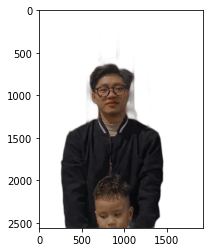

In [14]:
plt.imshow(img)

In [20]:
#Video

# Đọc video và lưu các frame ảnh lại
import cv2
video=cv2.VideoCapture('../img_test/stand.mp4')
fps=video.get(cv2.CAP_PROP_FPS)
count=0
flag=1
while flag:
    flag,image=video.read()
    if flag==0:
        break
    cv2.imwrite('./test_data/video/input_frames/'+'input'+str(count)+'.png',image)
    count=count+1

In [12]:
#Chạy model và đưa ra dự đoán và lưu trong folder u2netp_results.
exec(open("removal_background_video.py").read())

...load U2NETP---4.7 MB
inferencing: input0.png
inferencing: input1.png
inferencing: input10.png
inferencing: input100.png
inferencing: input101.png
inferencing: input102.png
inferencing: input103.png
inferencing: input104.png
inferencing: input105.png
inferencing: input106.png
inferencing: input107.png
inferencing: input108.png
inferencing: input109.png
inferencing: input11.png
inferencing: input110.png
inferencing: input111.png
inferencing: input112.png
inferencing: input113.png
inferencing: input114.png
inferencing: input115.png
inferencing: input116.png
inferencing: input117.png
inferencing: input118.png
inferencing: input119.png
inferencing: input12.png
inferencing: input120.png
inferencing: input121.png
inferencing: input122.png
inferencing: input123.png
inferencing: input124.png
inferencing: input125.png
inferencing: input126.png
inferencing: input127.png
inferencing: input128.png
inferencing: input129.png
inferencing: input13.png
inferencing: input130.png
inferencing: input131.

In [ ]:
#Trộn ảnh mask và ảnh gốc.
img_array=[]
sz = []
for i in range(count):
    u2netresult=cv2.imread('./test_data/video/u2netp_results/input'+str(i)+'.png')
  #original
    original=cv2.imread('./test_data/video/input_frames/input'+str(i)+'.png')
    subimage=cv2.subtract(u2netresult,original)
    cv2.imwrite('./test_data/video/output_frames/output'+str(i)+'.png',subimage)
    
    subimage=Image.open('./test_data/video/output_frames/output'+str(i)+'.png')
  #original
    original=Image.open('./test_data/video/input_frames/input'+str(i)+'.png')
    
    subimage=subimage.convert("RGBA")
    original=original.convert("RGBA")
    
    subdata=subimage.getdata()
    ogdata=original.getdata()

    newdata=[]
    for i in range(subdata.size[0]*subdata.size[1]):
        if subdata[i][0]==0 and subdata[i][1]==0 and subdata[i][2]==0:
            newdata.append((255,255,255,0))
        else:
            newdata.append(ogdata[i])
    subimage.putdata(newdata)
    subimage.save('./test_data/video/output_frames/output'+str(i)+'.png')
    final_img=cv2.imread('./test_data/video/output_frames/output'+str(i)+'.png')
    ht,wd,l=final_img.shape
    sz.append((wd,ht))
    img_array.append(final_img)

In [19]:
sz

(640, 360)

In [17]:
#Tạo video
sz=(640, 360)
outv=cv2.VideoWriter('./test_data/video/output_stand.mp4',0,fps,sz)
for i in img_array:
    outv.write(i)
outv.release() 
